### Prepare phenoype for subtype analysis : Motor task

- Build a scrubbing file to be used on subtype analysis for motor task
- Add mean run1 and run1 for FD an FD_scrubbed
- Visualize correlation between run 1 and 2 for FD and FD scrubbed
- merge clustered phenotype with scrubbing

In [57]:
# Import pandas
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [58]:
%matplotlib inline

In [59]:
# Set path
#path_root = "~/Drive/HCP/"
path_root = "/media/yassine/data_disk/Drive/HCP2/"
path_scrub = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group.csv")
# Read scrubbing file
scrub_raw = pd.read_csv(path_scrub)
scrub_raw.head(20)

,,frames_scrubbed,frames_OK,FD,FD_scrubbed
0,HCP100206_sess1_wmRL,0.0,405.0,0.083342,0.083342
1,HCP100206_sess1_wmLR,0.0,405.0,0.082368,0.082368
2,HCP100206_sess1_gambRL,0.0,253.0,0.081728,0.081728
3,HCP100206_sess1_gambLR,0.0,253.0,0.098565,0.098565
4,HCP100206_sess1_motRL,0.0,284.0,0.090883,0.090883
5,HCP100206_sess1_motLR,0.0,284.0,0.090883,0.090883
6,HCP100206_sess2_langRL,0.0,316.0,0.088456,0.088456
7,HCP100206_sess2_langLR,0.0,316.0,0.099963,0.099963
8,HCP100206_sess2_socRL,0.0,274.0,0.084949,0.084949
9,HCP100206_sess2_socLR,0.0,274.0,0.096656,0.096656


In [60]:
# Select specific task
# run1
scrub_select_RL = scrub_raw[scrub_raw[' '].str.contains("motRL")]
scrub_select_RL.rename(columns={'FD_scrubbed':'FD_scrubbed_RL','FD ':'FD_RL'},inplace=True)
scrub_select_RL.loc[:,'ID'] = scrub_select_RL[' '].str.replace('_sess1_motRL ','')

# run2 
scrub_select_LR = scrub_raw[scrub_raw[' '].str.contains("motLR")]
scrub_select_LR.rename(columns={'FD_scrubbed':'FD_scrubbed_LR','FD ':'FD_LR'},inplace=True)
scrub_select_LR.loc[:,'ID'] = scrub_select_LR[' '].str.replace('_sess1_motLR ','')

display(scrub_select_RL.head())
display(scrub_select_LR.head())

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view

,,frames_scrubbed,frames_OK,FD_RL,FD_scrubbed_RL,ID
4,HCP100206_sess1_motRL,0.0,284.0,0.090883,0.090883,HCP100206
18,HCP100307_sess1_motRL,0.0,284.0,0.108998,0.108998,HCP100307
32,HCP100408_sess1_motRL,0.0,284.0,0.098323,0.098323,HCP100408
46,HCP100610_sess1_motRL,13.0,271.0,0.139763,0.137298,HCP100610
60,HCP101006_sess1_motRL,63.0,221.0,0.165364,0.138544,HCP101006


,,frames_scrubbed,frames_OK,FD_LR,FD_scrubbed_LR,ID
5,HCP100206_sess1_motLR,0.0,284.0,0.090883,0.090883,HCP100206
19,HCP100307_sess1_motLR,0.0,284.0,0.108998,0.108998,HCP100307
33,HCP100408_sess1_motLR,0.0,284.0,0.098323,0.098323,HCP100408
47,HCP100610_sess1_motLR,13.0,271.0,0.139763,0.137298,HCP100610
61,HCP101006_sess1_motLR,63.0,221.0,0.165364,0.138544,HCP101006


In [61]:
# Select interest variables
scrub_select_LR_merge = scrub_select_LR [[' ','FD_LR','FD_scrubbed_LR','ID']]
scrub_select_RL_merge = scrub_select_RL [[' ','FD_RL','FD_scrubbed_RL','ID']]
display(scrub_select_RL_merge.head())
display(scrub_select_LR_merge.head())

,,FD_RL,FD_scrubbed_RL,ID
4,HCP100206_sess1_motRL,0.090883,0.090883,HCP100206
18,HCP100307_sess1_motRL,0.108998,0.108998,HCP100307
32,HCP100408_sess1_motRL,0.098323,0.098323,HCP100408
46,HCP100610_sess1_motRL,0.139763,0.137298,HCP100610
60,HCP101006_sess1_motRL,0.165364,0.138544,HCP101006


,,FD_LR,FD_scrubbed_LR,ID
5,HCP100206_sess1_motLR,0.090883,0.090883,HCP100206
19,HCP100307_sess1_motLR,0.108998,0.108998,HCP100307
33,HCP100408_sess1_motLR,0.098323,0.098323,HCP100408
47,HCP100610_sess1_motLR,0.139763,0.137298,HCP100610
61,HCP101006_sess1_motLR,0.165364,0.138544,HCP101006


In [62]:
# Merge the raw table 
if np.shape(scrub_select_RL_merge)[0] >= np.shape(scrub_select_LR_merge)[0]:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='left')
else:
    merged_scrub_RL_LR = pd.merge(scrub_select_RL_merge, scrub_select_LR_merge, on='ID', how='right')



In [63]:
merged_scrub_RL_LR.head()

,_x,FD_RL,FD_scrubbed_RL,ID,_y,FD_LR,FD_scrubbed_LR
0,HCP100206_sess1_motRL,0.090883,0.090883,HCP100206,HCP100206_sess1_motLR,0.090883,0.090883
1,HCP100307_sess1_motRL,0.108998,0.108998,HCP100307,HCP100307_sess1_motLR,0.108998,0.108998
2,HCP100408_sess1_motRL,0.098323,0.098323,HCP100408,HCP100408_sess1_motLR,0.098323,0.098323
3,HCP100610_sess1_motRL,0.139763,0.137298,HCP100610,HCP100610_sess1_motLR,0.139763,0.137298
4,HCP101006_sess1_motRL,0.165364,0.138544,HCP101006,HCP101006_sess1_motLR,0.165364,0.138544


In [64]:
merged_scrub_RL_LR_subset = merged_scrub_RL_LR[['ID','FD_RL','FD_scrubbed_RL','FD_LR','FD_scrubbed_LR']]

In [65]:
merged_scrub_RL_LR_subset.head()

,ID,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR
0,HCP100206,0.090883,0.090883,0.090883,0.090883
1,HCP100307,0.108998,0.108998,0.108998,0.108998
2,HCP100408,0.098323,0.098323,0.098323,0.098323
3,HCP100610,0.139763,0.137298,0.139763,0.137298
4,HCP101006,0.165364,0.138544,0.165364,0.138544


In [66]:
# calculate the mean FD and FD scrubbed
merged_scrub_RL_LR_subset.loc[:,'FD_scrubbed_mean'] = merged_scrub_RL_LR_subset[['FD_scrubbed_RL','FD_scrubbed_LR']].mean(axis=1)
merged_scrub_RL_LR_subset.loc[:,'FD_mean'] = merged_scrub_RL_LR_subset[['FD_RL','FD_LR']].mean(axis=1)

# replace empty cell by nan
merged_scrub_RL_LR_subset.replace('',np.nan,inplace=True)

# remove the ID header for niak_read_csv
merged_scrub_RL_LR_subset.rename(columns={'ID':''},inplace=True)

# Save the file
merged_scrub_RL_LR_subset.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/qc_scrubbing_group_motor.csv"), index=False)

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [67]:
# Show final table
merged_scrub_RL_LR_subset.head()

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
0,HCP100206,0.090883,0.090883,0.090883,0.090883,0.090883,0.090883
1,HCP100307,0.108998,0.108998,0.108998,0.108998,0.108998,0.108998
2,HCP100408,0.098323,0.098323,0.098323,0.098323,0.098323,0.098323
3,HCP100610,0.139763,0.137298,0.139763,0.137298,0.137298,0.139763
4,HCP101006,0.165364,0.138544,0.165364,0.138544,0.138544,0.165364


In [68]:
merged_scrub_RL_LR_subset.describe()

,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,0.142166,0.129280,0.142166,0.129280,0.129280,0.142166
std,0.048097,0.034196,0.048097,0.034196,0.034196,0.048097
min,0.066063,0.066063,0.066063,0.066063,0.066063,0.066063
25%,0.107364,0.102856,0.107364,0.102856,0.102856,0.107364
50%,0.132003,0.124629,0.132003,0.124629,0.124629,0.132003
75%,0.164631,0.149327,0.164631,0.149327,0.149327,0.164631
max,0.445685,0.289775,0.445685,0.289775,0.289775,0.445685


In [69]:
# find out if variables are correlated
corr= merged_scrub_RL_LR_subset.corr()

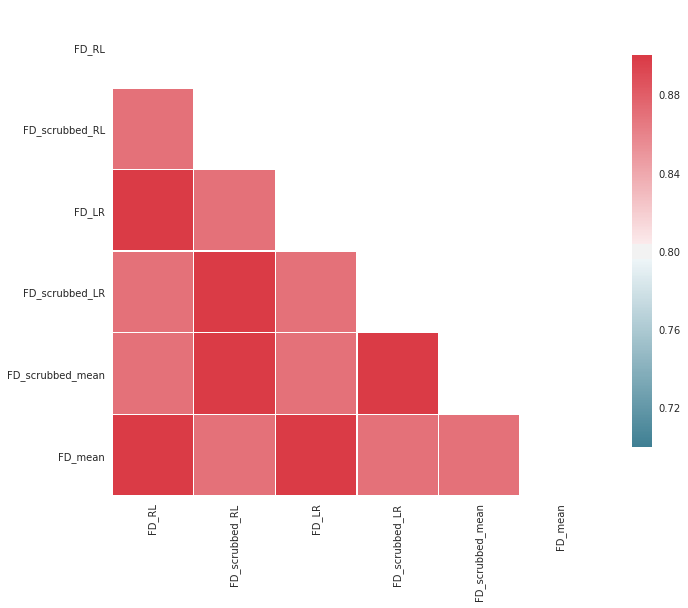

In [70]:
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap,vmax=0.9,vmin=0.7,
            square=True,mask=mask,
            linewidths=.5, cbar_kws={"shrink": .8}, ax=ax)

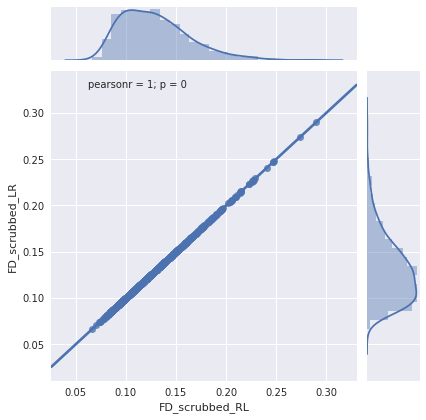

In [71]:
# FD_scrubbed correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_scrubbed_RL", y="FD_scrubbed_LR", data=merged_scrub_RL_LR_subset,kind="reg");

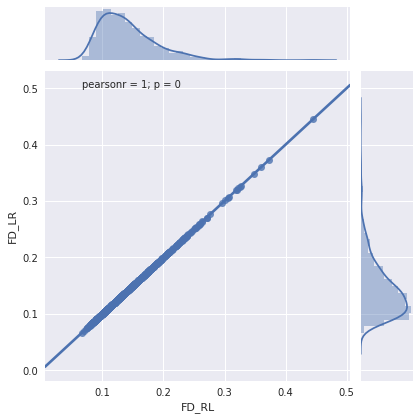

In [72]:
# FD correlation between runs
sns.set(color_codes=True)
sns.jointplot(x="FD_RL", y="FD_LR", data=merged_scrub_RL_LR_subset,kind="reg");

### merge clustered pheno with age gender and handedness

In [73]:
## merge clustered pheno with age gender and handedness
pheno_raw = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_all_pheno.csv'))
pheno_raw = pheno_raw.rename(columns=lambda x: x.strip())
pheno_clust = pd.read_csv(os.path.join(path_root,'subtypes_scores/26-10-2016/pheno/hcp_bootstraped_pheno_nonan_norm_python.csv'))
pheno_clust = pheno_clust.rename(columns=lambda x: x.strip())

In [74]:
merged_pheno = pd.merge(pheno_raw[['Subject','Age_in_Yrs','Gender','Twin_Stat','Zygosity','Mother_ID','BMI',"BPSystolic","BPDiastolic"]],
                        pheno_clust, on='Subject', how='right')
merged_pheno.loc[:,'Subject'] = 'HCP' + merged_pheno['Subject'].astype(str)
merged_pheno.head()

,Subject,Age_in_Yrs,Gender,Twin_Stat,Zygosity,Mother_ID,BMI,BPSystolic,BPDiastolic,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10
0,HCP100004,24,M,NotTwin,NotTwin,52259,25.49,135.0,77.0,0.134739,1.185358,-0.279920,0.085162,0.466965,-1.530547,0.398510,0.010144,-0.015847,-0.719794
1,HCP100206,27,M,NotTwin,NotTwin,56037,26.64,119.0,71.0,-0.344595,1.283574,0.052662,1.436342,0.706008,-0.510366,1.975280,1.294323,-0.025888,-0.203825
2,HCP100307,27,F,Twin,NotMZ,51488,22.96,117.0,70.0,-0.639736,0.522789,-0.952467,-0.713226,-0.559144,-0.140952,-0.703027,0.229112,0.097581,-0.444702
3,HCP100408,33,M,Twin,MZ,51730,27.75,152.0,94.0,1.173656,0.092160,-0.521888,-0.034026,-0.109229,0.221359,-0.589268,0.357483,-0.039443,0.095913
4,HCP100610,27,M,Twin,NotMZ,52813,36.91,141.0,75.0,0.891096,-0.361182,-0.881930,-0.386394,-0.575076,-0.197974,0.203063,0.618868,0.491618,1.343114


In [75]:
# check if there is any nan value
merged_pheno.isnull().values.any()

True

In [76]:
# remove missing 
missing = np.array([merged_pheno[col].isnull().values for col in merged_pheno.columns.get_values()]).any(0)
merged_pheno_clean = merged_pheno[~missing]
merged_pheno_clean.count()

Subject        927
Age_in_Yrs     927
Gender         927
Twin_Stat      927
Zygosity       927
Mother_ID      927
BMI            927
BPSystolic     927
BPDiastolic    927
Cluster_1      927
Cluster_2      927
Cluster_3      927
Cluster_4      927
Cluster_5      927
Cluster_6      927
Cluster_7      927
Cluster_8      927
Cluster_9      927
Cluster_10     927
dtype: int64

In [77]:
# set gender to numerical
merged_pheno_clean.loc[:,'Gender']= merged_pheno_clean.Gender.replace({'M':1,'F':2})

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [78]:
merged_pheno_clean.head()

,Subject,Age_in_Yrs,Gender,Twin_Stat,Zygosity,Mother_ID,BMI,BPSystolic,BPDiastolic,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10
0,HCP100004,24,1,NotTwin,NotTwin,52259,25.49,135.0,77.0,0.134739,1.185358,-0.279920,0.085162,0.466965,-1.530547,0.398510,0.010144,-0.015847,-0.719794
1,HCP100206,27,1,NotTwin,NotTwin,56037,26.64,119.0,71.0,-0.344595,1.283574,0.052662,1.436342,0.706008,-0.510366,1.975280,1.294323,-0.025888,-0.203825
2,HCP100307,27,2,Twin,NotMZ,51488,22.96,117.0,70.0,-0.639736,0.522789,-0.952467,-0.713226,-0.559144,-0.140952,-0.703027,0.229112,0.097581,-0.444702
3,HCP100408,33,1,Twin,MZ,51730,27.75,152.0,94.0,1.173656,0.092160,-0.521888,-0.034026,-0.109229,0.221359,-0.589268,0.357483,-0.039443,0.095913
4,HCP100610,27,1,Twin,NotMZ,52813,36.91,141.0,75.0,0.891096,-0.361182,-0.881930,-0.386394,-0.575076,-0.197974,0.203063,0.618868,0.491618,1.343114


In [79]:
#put HCP prefix then merge with scrubing
merged_pheno_scrub = pd.merge(merged_scrub_RL_LR_subset,merged_pheno_clean,how='left',left_on='',right_on='Subject')

In [80]:
merged_pheno_scrub.count()

                    855
FD_RL               855
FD_scrubbed_RL      855
FD_LR               855
FD_scrubbed_LR      855
FD_scrubbed_mean    855
FD_mean             855
Subject             821
Age_in_Yrs          821
Gender              821
Twin_Stat           821
Zygosity            821
Mother_ID           821
BMI                 821
BPSystolic          821
BPDiastolic         821
Cluster_1           821
Cluster_2           821
Cluster_3           821
Cluster_4           821
Cluster_5           821
Cluster_6           821
Cluster_7           821
Cluster_8           821
Cluster_9           821
Cluster_10          821
dtype: int64

In [81]:
# remove subject with missing data
missing_merged = np.array([merged_pheno_scrub[col].isnull().values for col in merged_pheno_scrub.columns.get_values()]).any(0)
merged_pheno_scrub_clean = merged_pheno_scrub[~missing_merged]

In [82]:
merged_pheno_scrub_clean.count()

                    821
FD_RL               821
FD_scrubbed_RL      821
FD_LR               821
FD_scrubbed_LR      821
FD_scrubbed_mean    821
FD_mean             821
Subject             821
Age_in_Yrs          821
Gender              821
Twin_Stat           821
Zygosity            821
Mother_ID           821
BMI                 821
BPSystolic          821
BPDiastolic         821
Cluster_1           821
Cluster_2           821
Cluster_3           821
Cluster_4           821
Cluster_5           821
Cluster_6           821
Cluster_7           821
Cluster_8           821
Cluster_9           821
Cluster_10          821
dtype: int64

In [83]:
merged_pheno_scrub_clean.head(10)

,,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean,Subject,Age_in_Yrs,Gender,...,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10
0,HCP100206,0.090883,0.090883,0.090883,0.090883,0.090883,0.090883,HCP100206,27.0,1.0,...,-0.344595,1.283574,0.052662,1.436342,0.706008,-0.510366,1.975280,1.294323,-0.025888,-0.203825
1,HCP100307,0.108998,0.108998,0.108998,0.108998,0.108998,0.108998,HCP100307,27.0,2.0,...,-0.639736,0.522789,-0.952467,-0.713226,-0.559144,-0.140952,-0.703027,0.229112,0.097581,-0.444702
2,HCP100408,0.098323,0.098323,0.098323,0.098323,0.098323,0.098323,HCP100408,33.0,1.0,...,1.173656,0.092160,-0.521888,-0.034026,-0.109229,0.221359,-0.589268,0.357483,-0.039443,0.095913
3,HCP100610,0.139763,0.137298,0.139763,0.137298,0.137298,0.139763,HCP100610,27.0,1.0,...,0.891096,-0.361182,-0.881930,-0.386394,-0.575076,-0.197974,0.203063,0.618868,0.491618,1.343114
4,HCP101006,0.165364,0.138544,0.165364,0.138544,0.138544,0.165364,HCP101006,35.0,2.0,...,0.608381,0.037740,0.055531,-0.883482,-0.383174,-0.309221,-0.753780,-1.183212,0.031989,-0.494022
5,HCP101107,0.090457,0.086319,0.090457,0.086319,0.086319,0.090457,HCP101107,22.0,1.0,...,-0.922800,0.202094,0.163451,0.227207,1.339868,0.352401,-0.277470,0.305663,-0.032826,-0.151062
6,HCP101309,0.108871,0.094527,0.108871,0.094527,0.094527,0.108871,HCP101309,29.0,1.0,...,-0.921495,-1.054605,-0.307215,-0.783720,-0.312067,0.398342,-0.668765,-0.523430,-0.159725,0.312902
7,HCP101410,0.160619,0.156698,0.160619,0.156698,0.156698,0.160619,HCP101410,29.0,1.0,...,0.326811,-0.213178,-0.409235,0.039428,-0.441181,0.390266,-0.376479,0.087171,-0.504826,-0.082847
8,HCP101915,0.109464,0.108079,0.109464,0.108079,0.108079,0.109464,HCP101915,35.0,2.0,...,-0.859532,-0.837023,-0.057703,-0.375249,-0.365499,1.175929,-0.647998,-0.660448,-0.344353,1.135137
9,HCP102008,0.108847,0.108847,0.108847,0.108847,0.108847,0.108847,HCP102008,24.0,1.0,...,0.471527,-0.101898,0.151105,0.954806,0.491990,0.656850,0.058323,1.136948,0.198473,-0.027216


In [84]:
##save to csv
# for solar
merged_pheno_scrub_clean.to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_motor_raw.csv"), index=False)
# for subtype
merged_pheno_scrub_clean.drop(['Subject','Twin_Stat', 'Zygosity'], axis=1).to_csv(os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_motor.csv"), index=False)